In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [3]:
# Set the x-axis to a list of strings for each month.
x_axis = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [10.02, 23.24, 39.20, 35.42, 32.34, 27.04, 43.82, 10.56, 11.85, 27.90, 20.71, 20.09]

In [4]:
# Get the standard deviation of the values in the y-axis.
stdev = statistics.stdev(y_axis)
stdev

11.208367917035753

<ErrorbarContainer object of 3 artists>

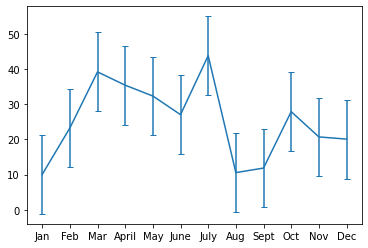

In [5]:
plt.errorbar(x_axis,y_axis,yerr=stdev, capsize=3)

<BarContainer object of 12 artists>

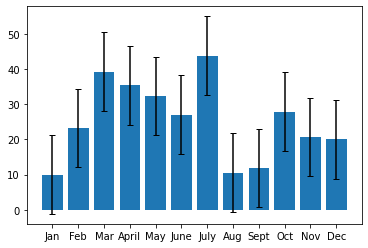

In [6]:
plt.bar(x_axis,y_axis,yerr=stdev, capsize=3)

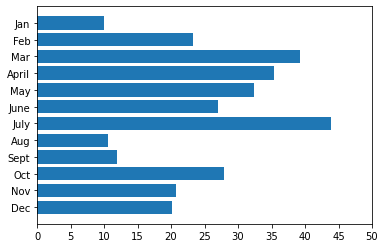

In [7]:
plt.barh(x_axis, y_axis)
plt.xticks(np.arange(0, 51, step=5.0))
plt.gca().invert_yaxis()

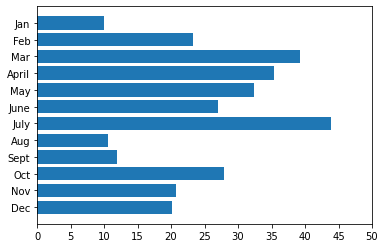

In [8]:
fig, ax = plt.subplots()
ax.barh(x_axis, y_axis)
ax.set_xticks(np.arange(0, 51, step=5.0))
plt.gca().invert_yaxis()
plt.show()

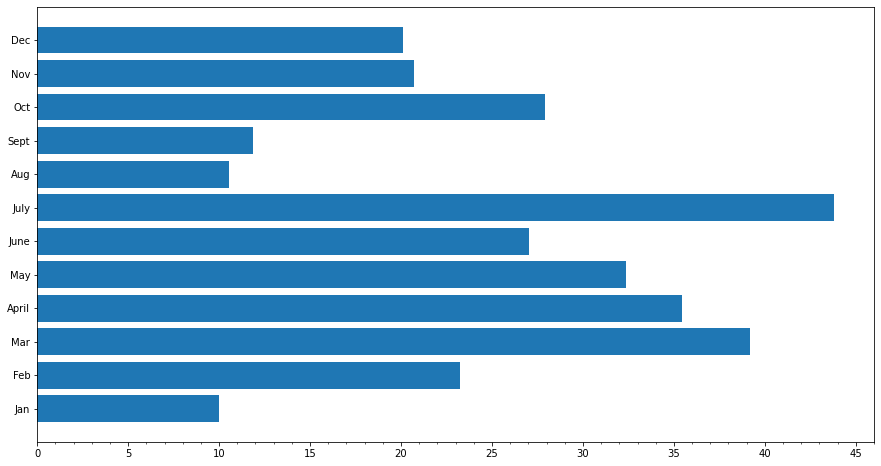

In [9]:
from matplotlib.ticker import MultipleLocator
# Increase the size of the plot figure.
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(x_axis, y_axis)
ax.set_xticks(np.arange(0, 47, step=5.0))

# Create minor ticks at an increment of 1.
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

In [10]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [12]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [13]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(['type']).count()['ride_id']
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [16]:
# 2. Get the total drivers for each city type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [17]:
#  3. Get the total amount of fares for each city type
type_fares_total = pyber_data_df.groupby(['type']).sum()['fare']
type_fares_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
#  4. Get the average fare per ride for each city type. 
type_fares_avg = pyber_data_df.groupby(['type']).mean()['fare']
type_fares_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [19]:
# 5. Get the average fare per driver for each city type. 
type_fares_avg_driver = pyber_data_df.groupby(['type']).sum()['fare'] / type_driver_count
type_fares_avg_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [26]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          [{"Total Rides": type_ride_count, 
          "Total Drivers": type_driver_count, 
          "Total Fares": type_fares_total,
          "Average Fare per Ride": type_fares_avg, 
          "Average Fare per Driver": type_fares_avg_driver}])


In [27]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
per_city_type = city_data_df.set_index(["type"])
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,type Rural 125 Suburban 625 Urban ...,type Rural 78 Suburban 490 Urban ...,type Rural 4327.93 Suburban 19356.33...,type Rural 34.623440 Suburban 30.9701...,type Rural 55.486282 Suburban 39.5027...


In [22]:
per_city_type = city_data_df.set_index(["type"])

In [23]:
#  8. Format the columns.
per_city_type = city_data_df.set_index(["type"])

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



TypeError: unsupported format string passed to Series.__format__

In [ ]:
pyber_data_df.groupby(['']).sum()['fare']
date_data_df = pd.DataFrame

In [ ]:
# 1. Read the merged DataFrame
pyber_summary_df

In [29]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

date_data_df = pyber_data_df.groupby(['date','type']).sum()['fare']
date_data_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [30]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_data_df = date_data_df.reset_index()
date_data_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_data_df_pivot = date_data_df.pivot(index='date',columns='type',values='fare')
date_data_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [ ]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.



In [ ]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()


In [ ]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

